# Photometry data analysis notebook

In [1]:
from photometry import analysis
from photometry import plotting
import matplotlib.pyplot as plt
import warnings


Ignore the cell immediately below (for development purposes only)

In [2]:
%reload_ext autoreload 
%autoreload 2

Load plotting parameters

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 7})
warnings.simplefilter("ignore", UserWarning)

Load doric files.

In [11]:
file_dict = {
  
    'file1' : analysis.DataFile(
        filename='../data/M91_saline_0001.doric', #local filename
        minutes_before_ttl_pulse=5, #number of minutes prior to ttl pulse over which to take the mean for baseline subtraction
        z_norm=True, #z_score data; i keep this at True when comparing multiple traces
        datatype='Saline', #Options are CNO, Saline, or <insert compound name>
        smoothing=1000 #parameter for smoothing. if you don't want to compute a smoothed trace, set to False. 
    ),


    'file2' : analysis.DataFile( #fill out the same properties as above for an optional second file 
        filename='../data/M91_CNO_0001.doric', 
        minutes_before_ttl_pulse=4, #can be different from minutes_before_ttl_pulse in first file, will align traces in plotting to a common injection point
        z_norm=True,
        datatype='CNO',
        smoothing=1000
    ),


    #COMMENT OUT/PASTE NEW FILE BLOCKS AS NEEDED (see below for example)
    # 'file3' : analysis.DataFile(
    #     filename='../data/M91_X_0001.doric',
    #     minutes_before_ttl_pulse=0,
    #     datatype='Compound',
    # ),
}

Plot df/f with no smoothing

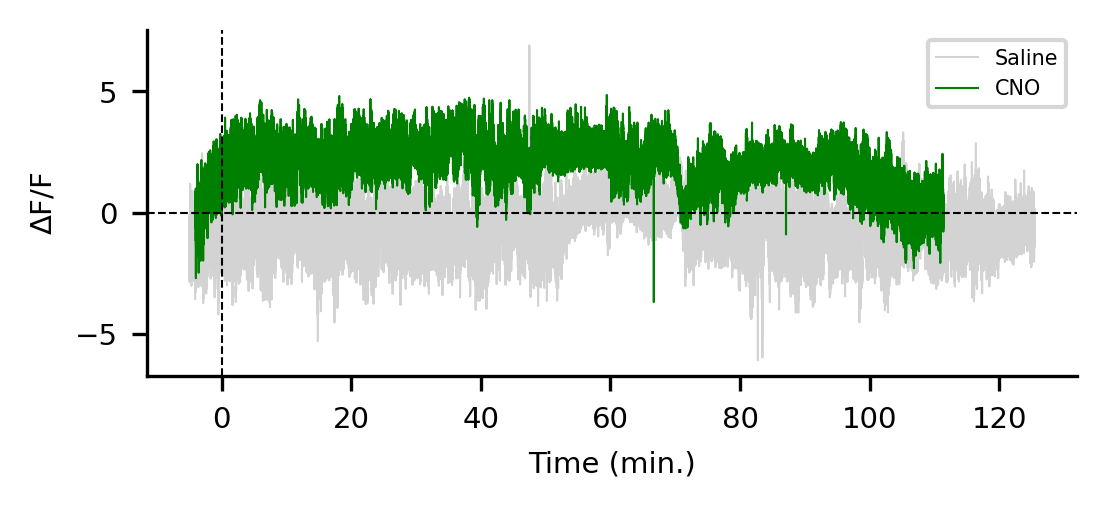

In [12]:
plotting.plot_traces(file_dict)

Plot df/f with smoothing

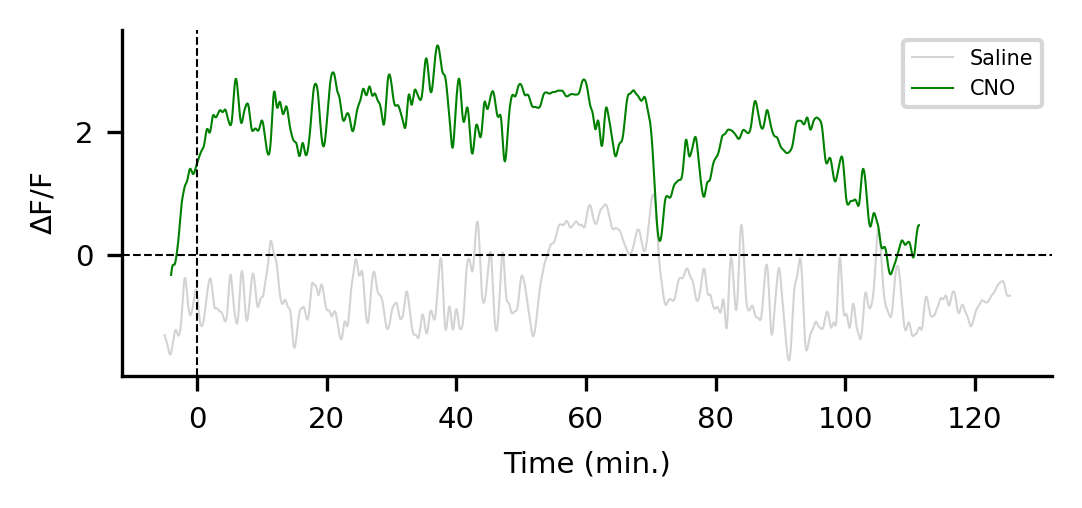

In [13]:
plotting.plot_traces(file_dict,smoothed=True)